In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# import data from the github page of the book
data = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/Introduction-to-Data-Analysis/master/chapter02/data/Absenteeism_at_work.csv', sep=";")

Kolmogorov-Smirnov test for normality pvalue: 0.000


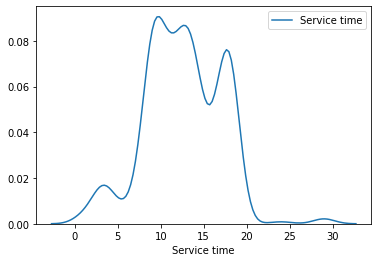

In [11]:
# create KDE plot of the Service time column
plt.figure()
ax = sns.kdeplot(data["Service time"])
ax.set_xlabel("Service time")
plt.savefig('figs/assignment_kde_plot.png', format='png', dpi=300)

# test distribution for Normality
from scipy.stats import kstest

ks_res = kstest(data["Service time"], "norm")
print(f"Kolmogorov-Smirnov test for normality pvalue: {ks_res[1]:.03f}")

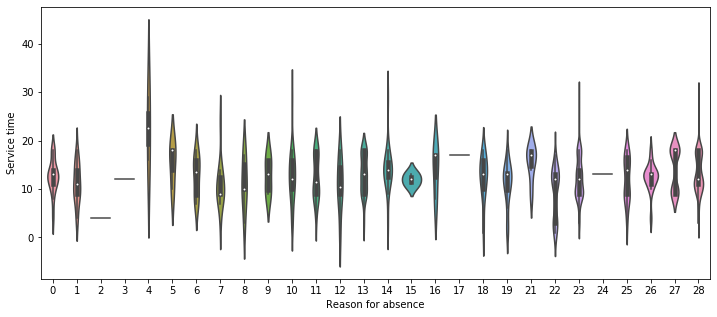

In [15]:
# create violin plot for the Service time, agains Reason for absence
plt.figure(figsize=(12,5))
sns.violinplot(x="Reason for absence", y="Service time",data=data)
plt.savefig('figs/assignment_service_time_vs_absence.png', format='png', dpi=300)

<Figure size 720x432 with 0 Axes>

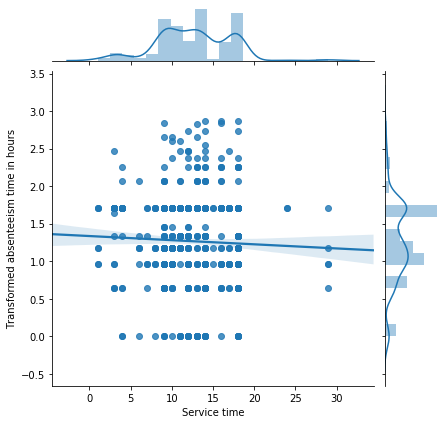

In [27]:
# produce correlation plot between Service time and Absenteeism time in hours
from scipy.stats import yeojohnson
plt.figure(figsize=(10, 6))
service_time = data["Service time"]
absenteeism_time = yeojohnson(data["Absenteeism time in hours"].apply(float))[0]
ax = sns.jointplot(x=service_time, y=absenteeism_time, kind="reg")
ax.set_axis_labels("Service time", "Transformed absenteeism time in hours")
plt.savefig('figs/assignment_jointplot.png', format='png', dpi=300)

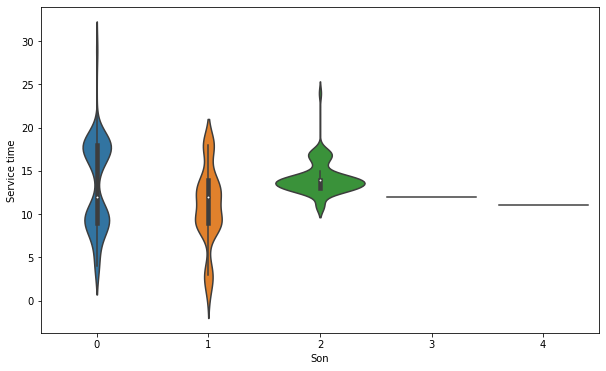

In [28]:
# analyze distribution of Absenteeism time in hours, per number of children
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x = "Son", y="Service time", data=data)
plt.savefig('figs/assignment_hours_vs_son.png', format='png', dpi=300)